# Music of the spheres
## General Physics Group Project

In [74]:
#Requires midiutil (saving) and pygame (playing) packages, available from pip
import numpy as np
from midiutil.MidiFile import MIDIFile
import matplotlib.pyplot as plt
import pygame
import pygame.mixer
from time import sleep

In [75]:
N=100 #Number of points to use
Mkm_to_AU= 0.00668458712
def dist_from_centre(x1,y1,x0,y0):
   return np.sqrt((x0-x1)**2+(y0-y1)**2)

class Planet:
    def __init__(self, name,orbital_data):
        self.name = name
        self.semi_major_axis = orbital_data[0]*Mkm_to_AU
        self.semi_minor_axis = (orbital_data[0])*np.sqrt(1-orbital_data[1]**2)*Mkm_to_AU
        self.eccentricity = orbital_data[1]
        self.period = orbital_data[2]
    
    def plot_ellipse(self):
        x0 = self.semi_major_axis*self.eccentricity #Position of focus (sun)
        y0 = 0
        t = np.linspace(0, 2*np.pi, N)
        x_range = x0+self.semi_major_axis*np.cos(t)
        y_range = y0+self.semi_minor_axis*np.sin(t)
        return x_range,y_range
    
    def plot_distance(self):
        x0 = self.semi_major_axis*self.eccentricity #Position of focus (sun)
        y0 = 0
        t = np.linspace(0, 2*np.pi, N)
        x_range = x0+self.semi_major_axis*np.cos(t)
        y_range = y0+self.semi_minor_axis*np.sin(t)
        t_range = (t/(np.pi*2))*self.period
        return t_range, dist_from_centre(x_range,y_range,x0,y0)
     
    def get_min_max_distance_from_sun(self):
        dist_array = self.plot_distance()[1]
        min_dist = np.min(dist_array)
        max_dist = np.max(dist_array)
        return min_dist,max_dist


In [76]:
mercury_data = [57.909, 0.2056, 87.969]
venus_data = [108.210, 0.0068, 224.701]
mars_data = [227.956, 0.0935, 686.980]
earth_data = [149.598, 0.0167, 365.256] 
jupiter_data = [778.479, 0.0487, 4332.589]
saturn_data = [1432.041, 0.0520, 10759.22]
uranus_data = [2867.043, 0.0469, 30685.4]
neptune_data = [4514.953, 0.0097, 60189]
pluto_data = [5869.656, 0.2444, 90560]

Mercury = Planet("Mercury",mercury_data)
Venus = Planet("Venus",venus_data)
Earth = Planet("Earth",earth_data)
Mars = Planet("Mars",saturn_data)
Jupiter = Planet("Jupiter",jupiter_data)
Saturn = Planet("Saturn",saturn_data)
Uranus = Planet("Uranus",uranus_data)
Neptune = Planet("Neptune",neptune_data)
Pluto = Planet("Pluto",pluto_data)

Planets = [Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune,Pluto]
distances = []
distances_dict = {}

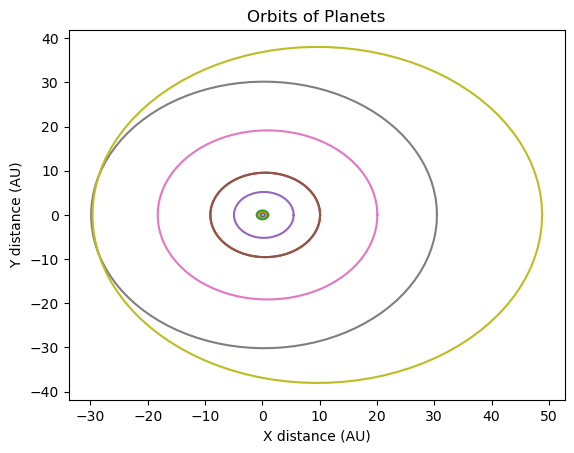

In [77]:
x_total = np.empty((len(Planets),N))
y_total = np.empty((len(Planets),N))
t_total = np.empty((len(Planets),N))
dist_total = np.empty((len(Planets),N))
 
#plt.axes().set_aspect('equal')
for i,planet in enumerate(Planets):
    x_total[i],y_total[i] = planet.plot_ellipse()
    plt.plot(x_total[i],y_total[i])
   
plt.title("Orbits of Planets")
plt.xlabel("X distance (AU)")
plt.ylabel("Y distance (AU)")
plt.show()



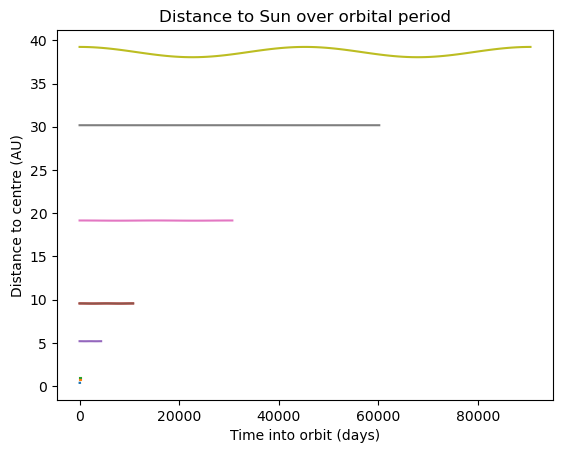

In [78]:
for i,planet in enumerate(Planets):
    t_total[i],dist_total[i] = planet.plot_distance()
    plt.plot(t_total[i],dist_total[i])
    
plt.title("Distance to Sun over orbital period")
plt.xlabel("Time into orbit (days)")
plt.ylabel("Distance to centre (AU)")
plt.show()

C:\Users\Neil Power\AppData\Local\Temp\ipykernel_19000\414404726.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(t_total[i]),np.log(dist_total[i]))


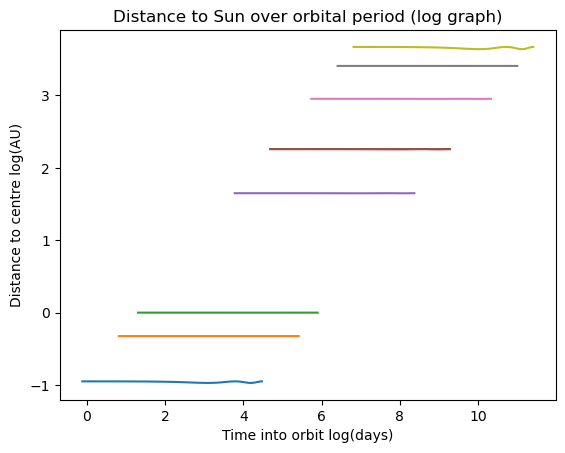

In [79]:
for i,planet in enumerate(Planets):
    plt.plot(np.log(t_total[i]),np.log(dist_total[i]))
    
plt.title("Distance to Sun over orbital period (log graph)")
plt.xlabel("Time into orbit log(days)")
plt.ylabel("Distance to centre log(AU)")
plt.show()

In [80]:
for i,planet in enumerate(Planets):
    name = planet.name
    min_dist = np.min(dist_total[i])
    max_dist = np.max(dist_total[i])
    print(f"{planet.name}: Min distance: {min_dist:3.2f} AU. Max distance: {min_dist:3.2f} AU.")

Mercury: Min distance: 0.38 AU. Max distance: 0.38 AU.
Venus: Min distance: 0.72 AU. Max distance: 0.72 AU.
Earth: Min distance: 1.00 AU. Max distance: 1.00 AU.
Mars: Min distance: 9.56 AU. Max distance: 9.56 AU.
Jupiter: Min distance: 5.20 AU. Max distance: 5.20 AU.
Saturn: Min distance: 9.56 AU. Max distance: 9.56 AU.
Uranus: Min distance: 19.14 AU. Max distance: 19.14 AU.
Neptune: Min distance: 30.18 AU. Max distance: 30.18 AU.
Pluto: Min distance: 38.05 AU. Max distance: 38.05 AU.


In [81]:
T = 1000 # Tension
mu = 0.001 # Linear density

def frequency(distance, n=1):
    return n * np.power(T / mu, 1/2) / (2 * distance)

def freq_to_note(freq):
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    note_number = 12 * np.log2(freq / 440) + 49  
    note_number = round(note_number)
        
    note = (note_number - 1 ) % len(notes)
    note = notes[note]
    
    octave = (note_number + 8 ) // len(notes)
    
    return note, octave

def midi_pitch_number(freq):
    m  =  12 * np.log2(freq/440) + 69
    return m

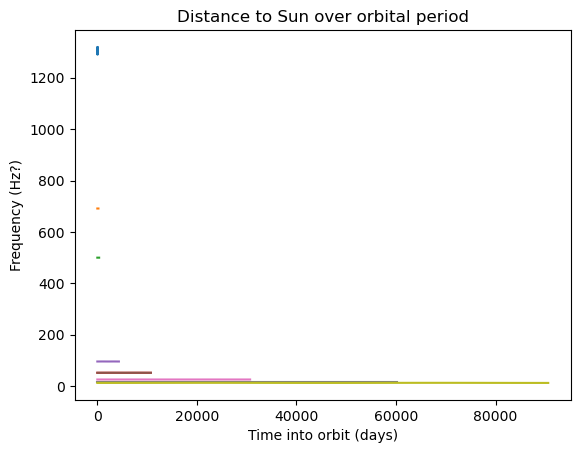

In [88]:
freq_total = np.empty((len(Planets),N))
for i,planet in enumerate(Planets):
    freq_total[i] = frequency(dist_total[i])
    plt.plot(t_total[i],freq_total[i])
    
plt.title("Frequency range over orbital period")
plt.xlabel("Time into orbit (days)")
plt.ylabel("Frequency (Hz?)")
plt.show()

In [85]:
min_notes = []
max_notes = []

def get_notes_properties(freq):
    midi = midi_pitch_number(freq)
    note, octave = freq_to_note(freq)
    return freq, note, octave, midi

for planet in Planets:
    min_freq = frequency(planet.get_min_max_distance_from_sun()[0]) #min distance
    max_freq = frequency(planet.get_min_max_distance_from_sun()[1]) #min distance
    min_notes.append(get_notes_properties(min_freq))
    max_notes.append(get_notes_properties(max_freq))
    
print(min_notes)
print(max_notes)

[(1319.8534170175897, 'E', 6, 88.01762740606702), (691.2546377542529, 'F', 5, 76.8205647712288), (500.0692874798226, 'B', 4, 71.21549374432473), (52.303141828122705, 'G#', 1, 32.12959191039621), (96.1975480391492, 'G', 2, 42.6788220389937), (52.303141828122705, 'G#', 1, 32.12959191039621), (26.11796014322031, 'G#', 0, 20.10732726874423), (16.567714803166528, 'C', 0, 12.227316068141533), (13.14175355663647, 'G#', -1, 8.216714093108237)]
[(1291.663392139104, 'E', 6, 87.64385668075417), (691.2386597854484, 'F', 5, 76.8201646014243), (499.99956801149324, 'B', 4, 71.21307989617843), (52.232397937896586, 'G#', 1, 32.10615983160385), (96.0834336897763, 'G', 2, 42.65827308313344), (52.232397937896586, 'G#', 1, 32.10615983160385), (26.089226905694602, 'G#', 0, 20.08827090237827), (16.5669355529024, 'C', 0, 12.226501775806625), (12.74332522644996, 'G#', -1, 7.68372195623256)]


In [83]:
# create your MIDI object
def create_midi_file(notes,midi_path):
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track

    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)

    # add some notes
    channel = 0
    volume = 100

    for _, _, _, midi in notes:
        
        pitch = round(midi) 
        time = 0 
        duration = 5 
        mf.addNote(track, channel, pitch, time, duration, volume)

    with open(midi_path, 'wb') as outf:
        mf.writeFile(outf)

create_midi_file(min_notes,"min_chord.midi")
create_midi_file(max_notes,"max_chord.midi")

In [84]:
def play_chord(midi_path):
    pygame.init()
    pygame.mixer.init()
    pygame.mixer.music.load(midi_path)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        sleep(1)

play_chord("min_chord.midi")
play_chord("max_chord.midi")